# PCHN63101: ANOVA Workshop

## Model Assumptions with Dummy Variables
Last week, we spent a lot of time discussing model assumptions and ways to address violations of assumptions. Although this was framed within multiple regression, we know that our aim here is to provide a *generic framework* for different types of analyses. In the accompanying lesson, we discovered that a $t$-test and ANOVA are effectively multiple regression in disguise. Part of the utility of this is that if these methods are just multiple regression, we can treat them in exactly the same way as any othe regression model. This is particularly useful when it comes to the assumptions because these are *exactly the same*. This means we can use the same diagnostic plots with the same interpretation *and* can use the same methods of adjusting violations of assumptions.

### Assumptions in a $t$-test
To simplest way to illustrate this connection is to use a basic $t$-test model. We will have a look at an ANOVA a little further below. To start with, we will use the `vs` variable from `mtcars` as a factor with two levels. In the code below, we can how to use the `factor()` function to turn the original `vs` variable into a factor with labels for each level.

In [1]:
data(mtcars)
mtcars$vs <- factor(mtcars$vs, levels=c(0,1), labels=c('V-shaped','Straight'))

We can now fit the model and view the summary

In [2]:
vs.mod <- lm(mpg ~ vs, data=mtcars)
summary(vs.mod)


Call:
lm(formula = mpg ~ vs, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-6.757 -3.082 -1.267  2.828  9.383 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   16.617      1.080  15.390 8.85e-16 ***
vsStraight     7.940      1.632   4.864 3.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.581 on 30 degrees of freedom
Multiple R-squared:  0.4409,	Adjusted R-squared:  0.4223 
F-statistic: 23.66 on 1 and 30 DF,  p-value: 3.416e-05


So we can see that there is a significant effect of engine shape ($t_{30} = 4.86, p < 0.001$), which matches what we would get from a basic $t$-test

In [3]:
t.test(mpg ~ vs, data=mtcars, var.equal=TRUE)


	Two Sample t-test

data:  mpg by vs
t = -4.8644, df = 30, p-value = 3.416e-05
alternative hypothesis: true difference in means between group V-shaped and group Straight is not equal to 0
95 percent confidence interval:
 -11.274221  -4.606732
sample estimates:
mean in group V-shaped mean in group Straight 
              16.61667               24.55714 


However, part of the utility of the approach using `lm()` is that we can now assess all the assumptions of the $t$-test using our familiar diagnostic plots

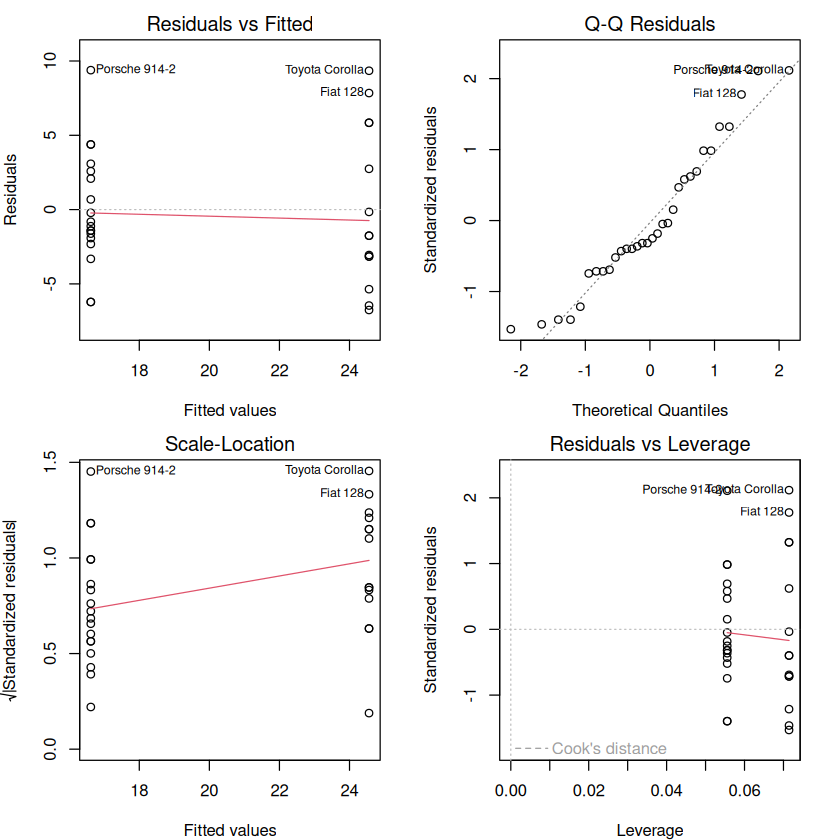

In [4]:
par(mfrow=c(2,2), mar=c(4,4,2,2))
plot(vs.mod)

<div class="alert alert-block alert-info"> 
<b>ACTIVITY ...</b> Before reading on, refer back to the interpretation of these plots from last week. Think about what they mean in the context of a $t$-test model and whether you think they are all still relevant?
</div>

In terms of interpreting these, we have the following guidance:

#### Residuals vs Fitted
The *Residuals vs Fitted* plot is less relevant with dummy variable models because the assumption of linearity is always met. All we are doing is drawing a line between the means of the two categories. The values in-between are not meaningful in the sense that a dummy value of 0.5 is not somehow half-way between the two groups. Because of this, there no sense in which having a curved line between the categories would make much sense. Indeed, this could not actually be fitted because a polynomial requires fewer unique points than degrees. If we had 3 categories, we could fit a *quadratic* curve through them, but this would require us to order the categories in some fashion, which is rarely meaningful.

#### Q-Q Residuals
Moving on to the *Q-Q Residuals* plot, this one *is* relevant for our simple $t$-test model. Remember, the normality assumption can also be thought of as the normality of the outcome variable *conditional* on the values of the predictor. When we have a dummy variable, the predictor only has *two* values, meaning that the assumption is that the data is normally distributed for each value of the dummy variable. In other words, normality is assumed *within each group*. In context, this means that the `Straight` engine group is normally distributed and the `V-shaped` engine group is normally distributed. This is a natural simplification of what we have seen before and means that this is one of the rarer cases where we could actually split the raw data into the two groups and then assess normality using the *outcome variable*. However, this is unnecessary when we can just stick to looking at the standardised residuals as usual.

<div class="alert alert-block alert-info"> 
<b>ACTIVITY ...</b> Imagine you are working with a researcher who has not had the benefit of a very thorough statistical education. They decide to assess the normality assumption by producing a single histogram of the whole outcome variable. Why is this wrong and how would you try and explain this to them? 
</div>


#### Scale-Location
In terms of the *Scale-Location* plot, this is also of importance because the traditional $t$-test assumes homogeneity of variance. In other words, that the variance of the population distribution that each group is sampled from is identical. This can be assessed in the same fashion as any other regression model, where we look for an equal scattering of points around the horizontal line. In this instance, there appears to be larger variance (a more dispersed scattering of points) in the `Other` category compared to the `USA` category. We will see how to deal with this during this week's workshop. 



#### Residuals vs Leverage
Finally, for the *Residuals vs Leverage* plot, our main concern is *outliers*. Notice that all data points within the same category have the same amount of leverage. As such, there is little sense in trying to interpret leverage in these types of model. If a single category has high leverage, all that means is that the group average is quite different from the other categories. Given that this is what we are interested in, it does not really matter, especially as this will not just be a single datapoint influencing the fit but a whole *group* of datapoints. Outliers, however, will matter because they will potentially bias the group means. Looking along the vertical axis, however, we can see no points that are particularly extreme, if we use a cut-off of $|t_{i}| > 3$. 

### Assumption Violations in the $t$-test

### Assumptions and Violations in an ANOVA

## The Regression ANOVA $F$-test
As a final point, it is interesting to note that we did not actually need to do any of the calculations above, because the results were provided all along at the bottom of the summary table for the full model.

In [ ]:
summary(full.mod)


Call:
lm(formula = mpg ~ 1 + origin, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8071 -4.1718 -0.7885  3.3444 10.5929 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   21.807      1.343  16.239 4.26e-16 ***
originJapan    3.753      2.618   1.434  0.16238    
originUSA     -5.669      1.935  -2.929  0.00656 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.025 on 29 degrees of freedom
Multiple R-squared:  0.3498,	Adjusted R-squared:  0.3049 
F-statistic:   7.8 on 2 and 29 DF,  p-value: 0.001947


Notice that the very last line says:

`F-statistic:   7.8 on 2 and 29 DF,  p-value: 0.001947`

which is exactly the results from the ANOVA table. In general, it is customary to always provide an omnibus test of the *whole* regression model, by comparing the full model to a model containing only an intercept. Because this model only contains a single predictor, this is then equivalent to the one-way ANOVA. In general, if there are multiple predictor variables, this will not be the same. However, the omnibus regression test is useful as a single way of asking the question "is our model actually doing anything?" or "is our model any better than just fitting an intercept?"

## Assumption Violations in ANOVA Models

### Using `gls()` for Violations of Homogeneity of Variance

#### One-way Example

#### Higher-order Example

Generalized least squares fit by REML
  Model: mpg ~ origin 
  Data: mtcars 
       AIC      BIC    logLik
  192.4491 200.6529 -90.22457

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | origin 
 Parameter estimates:
    Japan       USA    Europe 
1.0000000 0.6171796 0.9122182 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept) 21.807143  1.498187 14.555685  0.0000
originJapan  3.752857  3.130032  1.198984  0.2402
originUSA   -5.668681  1.830585 -3.096649  0.0043

 Correlation: 
            (Intr) orgnJp
originJapan -0.479       
originUSA   -0.818  0.392

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.5130471 -0.7420504 -0.2078919  0.7578757  1.8896570 

Residual standard error: 6.145135 
Degrees of freedom: 32 total; 29 residual
Analysis of Deviance Table (Type II tests)

Response: mpg
       Df  Chisq Pr(>Chisq)    
origin  2 16.462  0.0002663 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘*

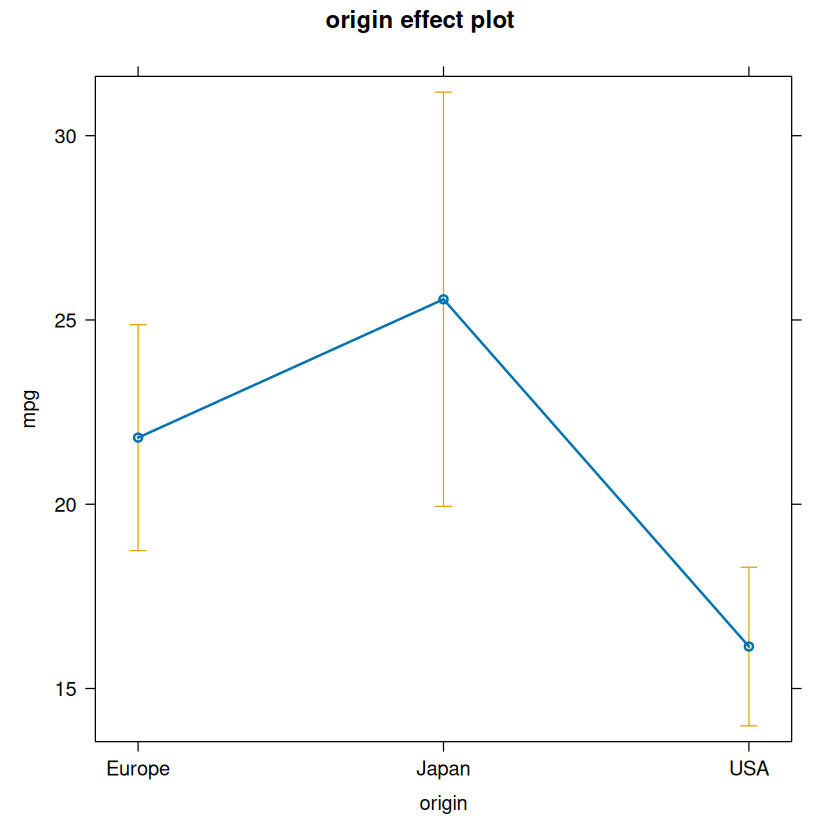

In [ ]:
library(nlme)
library(car)
library(effects)
library(emmeans)

data(mtcars)
mtcars$origin <- c('Japan','Japan','USA','USA','USA','USA','USA','Europe','Europe',
                   'Europe','Europe','Europe','Europe','Europe','USA','USA','USA',
                   'Europe','Japan','Japan','Japan','USA','USA','USA','USA',
                   'Europe','Europe','Europe','USA','Europe','Europe','Europe')

# Step 1 - convert categorical predictors
mtcars$origin <- as.factor(mtcars$origin)

# Step 2 - fit the model (GLS assuming heterogeneity of variance)
origin.gls.mod <- gls(mpg ~ origin, data=mtcars, weights=varIdent(form = ~1|origin))
print(summary(origin.gls.mod))

# Step 3 - generate the ANOVA table
anova.tbl <- Anova(origin.gls.mod)
print(anova.tbl)

# Step 4 - generate follow-up tests
follow.up <- emmeans(origin.gls.mod, specs=pairwise ~ origin, adjust='holm')
print(follow.up$contrasts)
print(confint(follow.up$contrasts))

# Step 5 - extract and plot effects
effs <- allEffects(origin.gls.mod)
plot(effs)

## 3-way ANOVA and Beyond

## Other Model Comparison Methods

### $R^{2}$

### AIC and BIC